In [25]:
import requests
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import graphing

import plotly.express as px

import plotly.graph_objects as go


from datetime import datetime

from mpl_toolkits import mplot3d

import statsmodels.formula.api as smf
import missingno as msno
from m1b_gradient_descent import gradient_descent
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae




In [2]:
def download_file(url, filename):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful
    response.raise_for_status()  # This will raise an exception for HTTP errors
    
    # Write the content to a file
    with open(filename, 'wb') as f:
        f.write(response.content)



In [4]:
url_1 = r"https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training-switzerland.csv"


download_file(url_1, 'dog-training-switzerland.csv')

In [6]:
data = pd.read_csv("dog-training.csv", delimiter="\t")

print(data.shape)
print(data.head())

(50, 5)
   month_old_when_trained  mean_rescues_per_year  age_last_year  \
0                      68                   21.1              9   
1                      53                   14.9              5   
2                      41                   20.5              6   
3                       3                   19.4              1   
4                       4                   24.9              4   

   weight_last_year  rescues_last_year  
0              14.5                 35  
1              14.0                 30  
2              17.7                 34  
3              13.7                 29  
4              18.4                 30  


In [7]:
# First, we define our formula using a special syntax
# This says that rescues_last_year is explained by weight_last_year
formula = "rescues_last_year ~ weight_last_year"

model = smf.ols(formula = formula, data = data).fit()

graphing.scatter_2D(data, "weight_last_year", "rescues_last_year", trendline = lambda x: model.params[1] * x + model.params[0])


C:\Users\danja\AppData\Local\Temp\ipykernel_88536\3218005904.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Train/test split

This time, instead of fitting a model to the entirety of our dataset, we're going to separate our dataset into two smaller partitions: a _training set_ and a _test set_.

The _training set_ is the largest of the two, usually made up of between 70-80% of the overall dataset, with the rest of the dataset making up the _test set_.

By splitting our data, we're able to gauge the performance of our model when confronted with previously unseen data. 

Notice that data on the _test set_ is never used in training. For that reason, it's commonly referred to as *unseen data* or data that is *unknown by the model*.

In [11]:
# Obtain the label and feature from the original data
dataset = data[['rescues_last_year','weight_last_year']]

# Split the dataset in an 70/30 train/test ratio. We also obtain the respective corresponding indices from the original dataset.
train, test = train_test_split(dataset, train_size=0.7, random_state=21)

print("Train")
print(train.head())
print(train.shape)

print("Test")
print(test.head())
print(test.shape)

Train
    rescues_last_year  weight_last_year
33                 30              19.4
0                  35              14.5
13                 36              19.5
28                 31              16.1
49                 37              23.0
(35, 2)
Test
    rescues_last_year  weight_last_year
7                  37              17.1
44                 25              15.4
43                 26              20.0
25                 32              22.2
14                 32              18.3
(15, 2)


In [13]:
# concatenate training and test so they can be graphed
plot_set = pd.concat([train,test])
plot_set["Dataset"] = ["train"] * len(train) + ["test"] * len(test)

# Create graph
px.scatter(plot_set, "weight_last_year", "rescues_last_year", "Dataset", trendline = lambda x: model.params[1] * x + model.params[0])

ValueError: Value '<function <lambda> at 0x0000022A2035BEC0>' for `trendline` must be one of dict_keys(['lowess', 'rolling', 'ewm', 'expanding', 'ols'])

C:\Users\danja\AppData\Local\Temp\ipykernel_88536\950842884.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



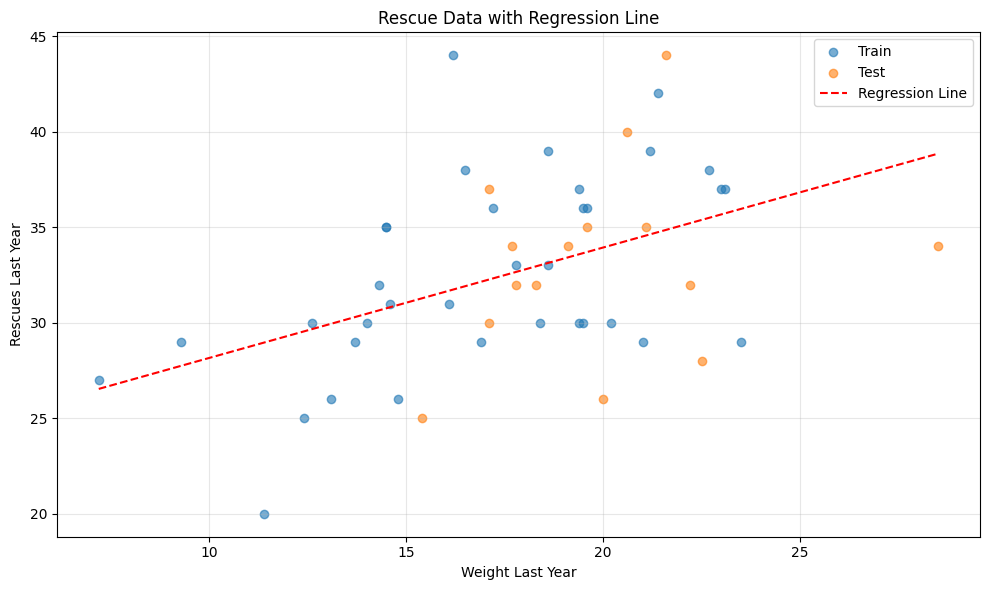

In [14]:
# Create the mosaic layout
mosaic = [['scatter']]  # Single plot in this case
fig, ax_dict = plt.subplot_mosaic(mosaic, figsize=(10, 6))

# Get the axes for our scatter plot
ax = ax_dict['scatter']

# Create scatter plot - different colors for train and test
train_mask = plot_set['Dataset'] == 'train'
ax.scatter(plot_set[train_mask]['weight_last_year'], 
          plot_set[train_mask]['rescues_last_year'], 
          label='Train', alpha=0.6)
ax.scatter(plot_set[~train_mask]['weight_last_year'], 
          plot_set[~train_mask]['rescues_last_year'], 
          label='Test', alpha=0.6)

# Generate points for regression line
x_range = np.linspace(plot_set['weight_last_year'].min(), 
                     plot_set['weight_last_year'].max(), 100)
y_range = model.params[1] * x_range + model.params[0]

# Add regression line
ax.plot(x_range, y_range, 'r--', label='Regression Line')

# Customize the plot
ax.set_xlabel('Weight Last Year')
ax.set_ylabel('Rescues Last Year')
ax.set_title('Rescue Data with Regression Line')
ax.legend()
ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
# We use the in-buit sklearn function to calculate the MSE
correct_labels = train['rescues_last_year']
predicted = model.predict(train['weight_last_year'])

MSE = mse(correct_labels, predicted)
MAE = mae(correct_labels, predicted)
print(f'MSE = {round(MSE, 3)}')
print(f'MAE = {round(MAE, 3)}')

MSE = 18.937
MAE = 3.428


In [28]:
graphing.scatter_2D(test, "weight_last_year", "rescues_last_year", trendline = lambda x: model.params[1] * x + model.params[0])

C:\Users\danja\AppData\Local\Temp\ipykernel_88536\370321289.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [29]:
correct_labels = test['rescues_last_year']
predicted = model.predict(test['weight_last_year'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 22.663722 


# New Dataset

To illustrate our point further, let's have a look at how our model performs when confronted with a completely new, unseen, and larger dataset. For our scenario, we'll use data provided by the avalanche rescue charity's European branch.

In [30]:
# Load an alternative dataset from the charity's European branch
new_data = pd.read_csv("dog-training-switzerland.csv", delimiter="\t")

print(new_data.shape)
new_data.head()


(500, 5)


,month_old_when_trained,mean_rescues_per_year,age_last_year,weight_last_year,rescues_last_year
0,9,16.7,2,15.709342,30
1,33,24.2,8,14.760819,35
2,43,20.2,4,13.118374,19
3,37,19.2,5,10.614075,24
4,45,16.9,8,17.519890,28


In [31]:
# Plot the fitted model against this new dataset. 

graphing.scatter_2D(new_data, "weight_last_year", "rescues_last_year", trendline = lambda x: model.params[1] * x + model.params[0])

C:\Users\danja\AppData\Local\Temp\ipykernel_88536\1171247030.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [32]:
correct_labels = new_data['rescues_last_year']
predicted = model.predict(new_data['weight_last_year'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 20.114975 


In [33]:
# Obtain the label and feature from the original data
dataset = data[['rescues_last_year','weight_last_year']]

# Print the number of observations
print("No. observations:", dataset.shape[0])

# Graph the distribution of variables for the unsplit dataset
graphing.scatter_2D(dataset, 'rescues_last_year', 'weight_last_year')

No. observations: 50


Notice we have 50 observations plotted (which corresponds to the number of samples in the dataset).

## Dataset split ratio comparison

We'll now split our dataset using different ratios to understand how these can affect our models.

In [34]:

# Split Dataset using different ratios 50:50, 60:40, 70:30, 80:20
train_5050, test_5050 = train_test_split(dataset, test_size=0.5, random_state=2)
train_6040, test_6040 = train_test_split(dataset, test_size=0.4, random_state=2)
train_7030, test_7030 = train_test_split(dataset, test_size=0.3, random_state=2)
train_8020, test_8020 = train_test_split(dataset, test_size=0.2, random_state=2)

# Add a column to each set to identify if a datapoint belongs to "train" or "test"
train_5050, test_5050 = train_5050.assign(Set="train"), test_5050.assign(Set="test")
train_6040, test_6040 = train_6040.assign(Set="train"), test_6040.assign(Set="test")
train_7030, test_7030 = train_7030.assign(Set="train"), test_7030.assign(Set="test")
train_8020, test_8020 = train_8020.assign(Set="train"), test_8020.assign(Set="test")

# Concatenate the "train" and "test" sets for each split so we can plot them on the same chart
df_5050 = pd.concat([train_5050, test_5050], axis=0)
df_6040 = pd.concat([train_6040, test_6040], axis=0)
df_7030 = pd.concat([train_7030, test_7030], axis=0)
df_8020 = pd.concat([train_8020, test_8020], axis=0)

# Plot each distribution for comparison
graphing.scatter_2D(df_5050, "weight_last_year", "rescues_last_year", title="50:50 split", label_colour="Set", show=True)
graphing.scatter_2D(df_6040, "weight_last_year", "rescues_last_year", title="60:40 split", label_colour="Set", show=True)
graphing.scatter_2D(df_7030, "weight_last_year", "rescues_last_year", title="70:30 split", label_colour="Set", show=True)
graphing.scatter_2D(df_8020, "weight_last_year", "rescues_last_year", title="80:20 split", label_colour="Set")

In [35]:
# Add a column for each "train" set that identifies the split used
train_8020 = train_8020.assign(Split="80:20")
train_7030 = train_7030.assign(Split="70:30")
train_6040 = train_6040.assign(Split="60:40")
train_5050 = train_5050.assign(Split="50:50")

# Concatenate training sets so we can plot them on the same chart
split_df = pd.concat([train_5050, train_6040, train_7030, train_8020], axis=0)

 # Plot a histogram of data distribution
graphing.multiple_histogram(split_df, label_x="rescues_last_year", label_group="Split", title="Distribution of Training data")

In [37]:


def train_and_test_model(name, train, test):
    '''
    This method creates a model, trains it on the provided data, and assesses 
    it against the test data
    '''
    # This formula says that rescues_last_year is explained by weight_last_year
    formula = "rescues_last_year ~ weight_last_year"

    # Create and train a linear regression model using the training data
    model = smf.ols(formula = formula, data = train).fit()

    # Now evaluate the model (by calculating the Mean Squared Error) using the 
    # corresponding "test" set for that split
    correct_answers = test['rescues_last_year']
    predictions = model.predict(test['weight_last_year'])
    MSE = mse(correct_answers, predictions)
    print(name + ' MSE = %f ' % MSE)

    return model


# Train a model and test it for each kind of split
print("Mean Squared Error values (smaller is better)")
model_5050 = train_and_test_model("50:50", train_5050, test_5050)
model_6040 = train_and_test_model("60:40", train_6040, test_6040)
model_7030 = train_and_test_model("70:30", train_7030, test_7030)
model_8020 = train_and_test_model("80:20", train_8020, test_8020)

Mean Squared Error values (smaller is better)
50:50 MSE = 21.930788 
60:40 MSE = 19.834762 
70:30 MSE = 23.747817 
80:20 MSE = 18.441786 


The preceding code trains one model for each ratio, using the corresponding _train_ set for that ratio. It then calculates the MSE (Mean Squared Error) for each model, using its corresponding _test_ set.

The results seem mixed. The `80:20` ratio was best, but there's no clear pattern as to whether growing or shrinking the training set is helpful.

Two things are influencing our results. First, the larger the _test_ set, the more we can trust the test results. Secondly, models usually will train better with larger training sets. 

These influences are at odds with one another, and how influential they are is exaggerated here because our dataset it very small. In this particular situation, it's hard to assess whether the `60:40` split is truly better than the `70:30` split, for example. This is because the `70:30 split` might just give the appearance of being worse because it was tested against a less-representative (smaller) test set.

## Model evaluation

Let's take a look now at what happens when these models are used against a much larger dataset on which it wasn't trained or tested. This can happen in the real world because we choose to hold back data in the beginning, or simply because we collect data after training our model. In our current scenario, this is new data given to us by our avalanche-rescue charity's European arm.

In [39]:
# Load some dog statistics from our charity's European arm
swiss_data = pd.read_csv("dog-training-switzerland.csv", delimiter="\t")

# Show show information about the data
print(f"The Swiss dataset contains {swiss_data.shape[0]} samples")
graphing.scatter_2D(swiss_data, 'rescues_last_year', 'weight_last_year')

The Swiss dataset contains 500 samples


In [40]:
# Test our models against the swiss data
features = swiss_data['weight_last_year']
correct_answers = swiss_data['rescues_last_year']

# We will now assess our models. Notice we're not training them again.
# We are simply testing them against some new data 

# Assess the model trained on a 50:50 split
predictions = model_5050.predict(features)
MSE = mse(correct_answers, predictions)
print('50:50 MSE = %f ' % MSE)

# Assess the model trained on a 60:40 split
predictions = model_6040.predict(features)
MSE = mse(correct_answers, predictions)
print('60:40 MSE = %f ' % MSE)

# Assess the model trained on a 70:30 split
predictions = model_7030.predict(features)
MSE = mse(correct_answers, predictions)
print('70:30 MSE = %f ' % MSE)

# Assess the model trained on a 80:20 split
predictions = model_8020.predict(features)
MSE = mse(correct_answers, predictions)
print('80:20 MSE = %f ' % MSE)

50:50 MSE = 20.903325 
60:40 MSE = 20.520190 
70:30 MSE = 20.355991 
80:20 MSE = 20.061225 
